In [1]:
list.files('/kaggle/input')


[1] "data-file" "economic"  "gdp-1011"  "image1"    "us-pop"

## Load The Package

In [2]:
# Load tidyverse, leaflet, and leaflet.extras
library(leaflet)
library(tidyverse)
#library(leaflet.extras)
library(sf)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Linking to GEOS 3.8.0, GDAL 3.0.4, PROJ 6.3.1; sf_use_s2() is TRUE



## Reading the Data

In [3]:
# Read datasets/chipotle.csv into a tibble named chipotle using read_csv
chipotle <- read.csv('/kaggle/input/data-file/chipotle.csv')
gdp=read_csv('/kaggle/input/economic/Economic.csv')
popi=read_csv('/kaggle/input/us-pop/population_till_20191.csv')
# Print out the chipotle tibble using the head function


Rows: 52 Columns: 192
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (2): StateCodes, State
dbl (190): Region, Division, Coast, Great Lakes, TotalC2010, TotalC2011, Tot...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 51 Columns: 151
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (1): NAME
dbl (150): SUMLEV, REGION, DIVISION, STATE, CENSUS2010POP, ESTIMATESBASE2010...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
head(gdp)

StateCodes State      Region Division Coast Great Lakes TotalC2010 TotalC2011
1 AL         Alabama    3      6        1     0           1931522    1905207   
2 AK         Alaska     4      9        1     0            653221     653637   
3 AZ         Arizona    4      8        0     0           1383531    1424944   
4 AR         Arkansas   3      7        0     0           1120632    1122544   
5 CA         California 4      9        1     0           7760629    7777115   
6 CO         Colorado   4      8        0     0           1513547    1470445   
  TotalC2012 TotalC2013 ⋯ RINTERNATIONALMIG2013 RINTERNATIONALMIG2014
1 1879716    1919365    ⋯ 1.165832              1.157861             
2  649341     621107    ⋯ 3.203618              2.869760             
3 1395839    1414383    ⋯ 1.090035              1.091283             
4 1067642    1096438    ⋯ 2.141877              2.129805             
5 7564063    7665241    ⋯ 4.207353              4.177389             
6 1440781    1470844    ⋯ 2.074200              2.010735             
  RDOMESTICMIG2011 RDOMESTICMIG2012 RDOMESTICMIG2013 RDOMESTICMIG2014
1 -0.02044325      -0.1684135        0.3964159         0.4201015     
2 -1.17513721      -1.9495712       -3.7893131       -13.7544937     
3  1.34147180      -0.4208753       -0.5805623        -1.3130505     
4  1.36951366       5.1312819        3.9104760         6.2806359     
5 -1.16207924      -1.1739507       -1.3412263        -0.8309823     
6  5.18339661       5.5536752        6.9775832         7.5871626     
  RNETMIG2011 RNETMIG2012 RNETMIG2013 RNETMIG2014
1 1.0119408   1.0013329    1.5622474    1.5779626
2 0.9481854   1.8353761   -0.5856954  -10.8847340
3 2.3178012   0.6219715    0.5094731   -0.2217671
4 3.3366276   7.1552124    6.0523531    8.4104410
5 2.7613775   2.7727695    2.8661268    3.3464065
6 6.9331593   7.6608637    9.0517828    9.5978981

In [5]:
head(popi)

SUMLEV REGION DIVISION STATE NAME         CENSUS2010POP ESTIMATESBASE2010
1 40     4      9         6    California   37253956      37254519         
2 40     3      7        48    Texas        25145561      25146091         
3 40     3      5        12    Florida      18801310      18804564         
4 40     1      2        36    New York     19378102      19378144         
5 40     1      2        42    Pennsylvania 12702379      12702868         
6 40     2      3        17    Illinois     12830632      12831572         
  POPESTIMATE2010 POPESTIMATE2011 POPESTIMATE2012 ⋯ RDOMESTICMIG2019
1 37319502        37638369        37948800        ⋯ -5.151429       
2 25241971        25645629        26084481        ⋯  4.361336       
3 18845537        19053237        19297822        ⋯  6.268893       
4 19399878        19499241        19572932        ⋯ -9.267874       
5 12711160        12745815        12767118        ⋯ -1.530139       
6 12840503        12867454        12882510        ⋯ -8.268277       
  RNETMIG2011 RNETMIG2012 RNETMIG2013 RNETMIG2014 RNETMIG2015 RNETMIG2016
1  1.2767972   1.4950156   1.64903138  2.2035511   1.9849573   0.5000438 
2  7.4568657   8.7646827   7.13234670 10.0030688  10.6443006   8.3697115 
3  8.9259352  10.5615336  11.07929593 13.2024314  16.4914936  18.2583049 
4  0.3107011  -0.9632431  -1.79170143 -3.1301451  -4.1744566  -5.3790851 
5  1.5528161   0.5034309  -0.05864522 -0.1617078  -0.9276921  -0.9736732 
6 -2.6354486  -3.3930921  -3.13589619 -5.1114791  -6.0288060  -6.9059138 
  RNETMIG2017 RNETMIG2018 RNETMIG2019 
1 -0.6299091  -2.1309543  -3.276681177
2  6.5105509   5.4484283   6.618845958
3 15.6163887  12.6578110  10.420285500
4 -6.1274252  -6.4060965  -6.920598425
5  0.2847096   0.8553821  -0.004374503
6 -6.6496988  -7.3280033  -6.755453026

In [6]:
head(chipotle)

id      street                   city        st ctry          lat     
1 1358023 121 N. La Cienega Blvd., Los Angeles NA United States 34.07366
2 1358955 24369 Cedar Rd,          Lyndhurst   OH United States 41.50338
3 1359012 1130 West Grove Ave.,    Mesa        NA United States 33.39023
4 1359490 6316 Delmar,             St. Louis   MO United States 38.65559
5 1359574 1464 St. Louis Galleria, St. Louis   MO United States 38.63275
6 1359575 8301 Westchester,        Dallas      TX United States 32.86364
  lon        closed status
1 -118.37650 TRUE         
2  -81.50298 TRUE         
3 -111.85550 TRUE         
4  -90.30255 TRUE         
5  -90.34855 TRUE         
6  -96.80657 TRUE

 ### Do Chipotle stores ever close?¶

In [7]:
closed_chipotles <- 
  chipotle %>% 
  # Filter the chipotle tibble to stores with a value of t for closed
  filter(closed == TRUE) %>% 
  leaflet() %>% 
  # Use addTiles to plot the closed stores on the default Open Street Map tile
  addTiles() %>%
  # Plot the closed stores using addCircles
  addCircles() 

# Print map of closed chipotles
closed_chipotles

Assuming "lon" and "lat" are longitude and latitude, respectively



HTML widgets cannot be represented in plain text (need html)

In [8]:
## How many Chipotle stores have closed?

In [9]:
# Use count from dplyr to count the values for the closed variable
chipotle %>% 
  count(closed)
# Create a new tibble named chipotle_open that contains only open chipotle 
chipotle_open <-
  chipotle  %>% 
  filter(closed == FALSE) %>% 
  # Drop the closed column from chipotle_open
  select(-closed)

closed n   
1 FALSE  2463
2  TRUE    15

In [10]:
## Where are (and aren't) there Chipotles?

In [11]:
install.packages("leaflet.extras")
library(leaflet.extras)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [12]:
chipotle_heatmap <- 
  chipotle_open %>% 
  leaflet() %>% 
  # Use addProviderTiles to add the CartoDB provider tile 
  addProviderTiles('CartoDB') %>%
  # Use addHeatmap with a radius of 8
  addHeatmap(radius = 8)

# Print heatmap
chipotle_heatmap 

Assuming "lon" and "lat" are longitude and latitude, respectively



HTML widgets cannot be represented in plain text (need html)

In [13]:
#Which States have the fewest Chipotles?

In [14]:
# Create a new tibble called chipotles_by_state to store the results
chipotles_by_state <- 
  chipotle_open %>% 
  # Filter the data to only Chipotles in the United States
  filter(ctry=='United States') %>% 
  # Count the number of stores in chipotle_open by st
  count(st) %>% 
  # Arrange the number of stores by state in ascending order
  arrange(n)

# Print the state countsprint(chipotles_by_state, n = Inf)

In [15]:
head(chipotles_by_state)

st n
1 MS 1
2 ND 1
3 VT 1
4 WY 2
5 MT 3
6 ME 5

In [16]:
library(treemap)
library(RColorBrewer)
library(treemap)
library(treemap)
library(ggplot2)


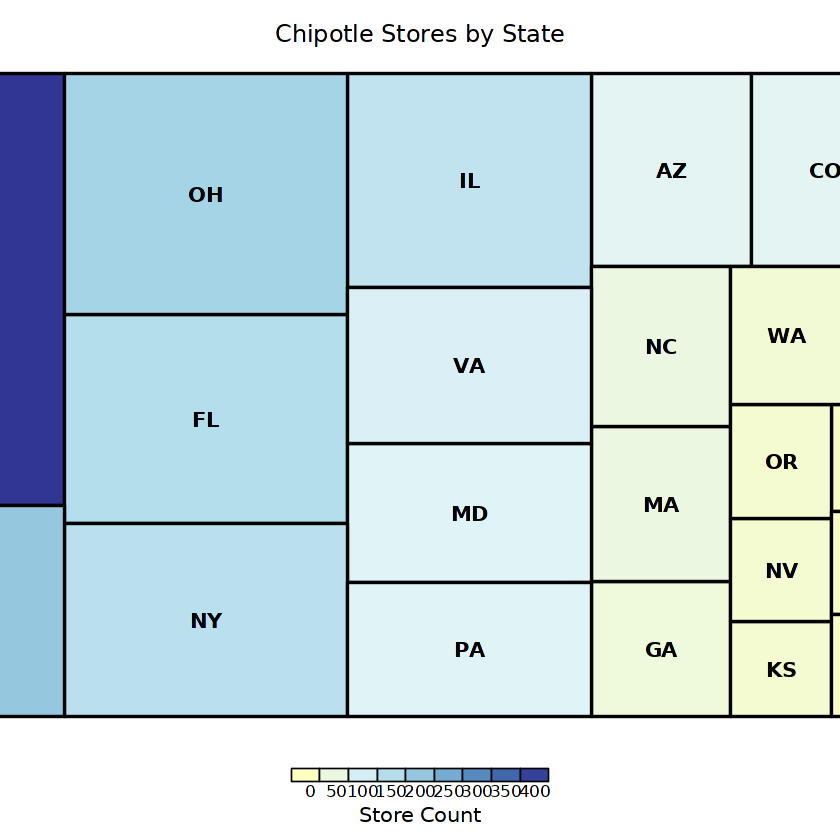

In [17]:
library(IRdisplay)
# Create the treemap
treemap(chipotles_by_state,
        index = "st",
        vSize = "n",
        type = "value",
        title = "Chipotle Stores by State",
        fontsize.labels = 12,
        fontcolor.labels = "black",
        title.legend = "Store Count",
        fontsize.legend = 12,
        vColor = "n",
        palette = "RdYlBu"
)
#there seem some issue with kaggle for displaying teh image so I have written the code in R studio and copy pasted the image here

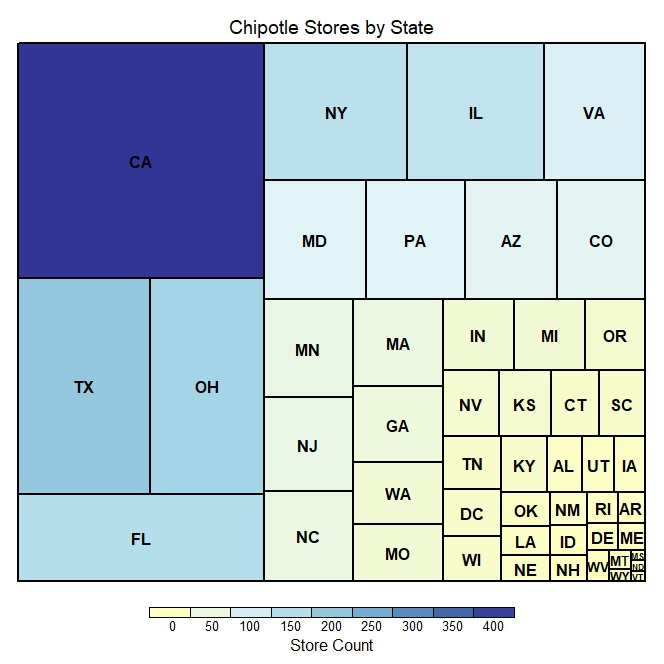

In [18]:
colnames(gdp)[2] <- "NAME"

In [19]:
data_gdp <- gdp[, c('NAME', 'GDP2014')]
head(data_gdp)

NAME       GDP2014   
1 Alabama     197534.50
2 Alaska       58066.75
3 Arizona     281558.75
4 Arkansas    121064.75
5 California 2324995.50
6 Colorado    305366.75

In [20]:
data_popi <- popi[, c('NAME','POP_ESTIMATE_2019')]
head(data_popi)

NAME         POP_ESTIMATE_2019
1 California   39512223         
2 Texas        28995881         
3 Florida      21477737         
4 New York     19453561         
5 Pennsylvania 12801989         
6 Illinois     12671821

In [21]:
# Check column names in data_popi
print(names(data_popi))

# Check column names in data_gdp
print(names(data_gdp))

[1] "NAME"              "POP_ESTIMATE_2019"
[1] "NAME"    "GDP2014"


In [22]:
merged_data <- merge(data_popi, data_gdp, by = "NAME")

In [23]:
head(merged_data)

NAME       POP_ESTIMATE_2019 GDP2014   
1 Alabama     4903185           197534.50
2 Alaska       731545            58066.75
3 Arizona     7278717           281558.75
4 Arkansas    3017804           121064.75
5 California 39512223          2324995.50
6 Colorado    5758736           305366.75

In [24]:
state_lookup <- tibble(Abbreviation = c("AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA",
                                           "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD",
                                           "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ",
                                           "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC",
                                           "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"),
                          FullName = c("Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado",
                                       "Connecticut", "Delaware", "Florida", "Georgia", "Hawaii", "Idaho",
                                       "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana",
                                       "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota",
                                       "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada",
                                       "New Hampshire", "New Jersey", "New Mexico", "New York",
                                       "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon",
                                       "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota",
                                       "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington",
                                       "West Virginia", "Wisconsin", "Wyoming"))


In [25]:
# Merge the tibble with the lookup tibble to get full state names
chipotles_with_full_names <- merge(chipotles_by_state, state_lookup, by.x = "st", by.y = "Abbreviation", all.x = TRUE)

# Rename the "FullName" column to "StateFullName" (optional)
colnames(chipotles_with_full_names)[3] <- "NAME"

# Display the updated tibble with full state names
head(chipotles_with_full_names)

st n   NAME       
1 AL  14 Alabama    
2 AR   6 Arkansas   
3 AZ  80 Arizona    
4 CA 415 California 
5 CO  75 Colorado   
6 CT  23 Connecticut

In [26]:
chipotle_with_full_name_1=chipotles_with_full_names[, c('NAME','n')]
head(chipotle_with_full_name_1)

NAME        n  
1 Alabama      14
2 Arkansas      6
3 Arizona      80
4 California  415
5 Colorado     75
6 Connecticut  23

In [27]:
class(chipotles_by_state)

[1] "data.frame"

In [28]:
merged_new_data <- merge(chipotle_with_full_name_1, merged_data, by = "NAME")

# Print the merged data frame
head(merged_new_data)

NAME        n   POP_ESTIMATE_2019 GDP2014  
1 Alabama      14  4903185           197534.5
2 Arizona      80  7278717           281558.8
3 Arkansas      6  3017804           121064.8
4 California  415 39512223          2324995.5
5 Colorado     75  5758736           305366.8
6 Connecticut  23  3565287           250763.8

In [29]:
colnames(merged_new_data)[4] <- "GDP_2014"

In [30]:
colnames(merged_new_data)[2] <- "no_chipotle_store"
head(merged_new_data)

NAME        no_chipotle_store POP_ESTIMATE_2019 GDP_2014 
1 Alabama      14                4903185           197534.5
2 Arizona      80                7278717           281558.8
3 Arkansas      6                3017804           121064.8
4 California  415               39512223          2324995.5
5 Colorado     75                5758736           305366.8
6 Connecticut  23                3565287           250763.8

In [31]:
merged_new_data$gdp_per_capita <- round(merged_new_data$GDP_2014 / merged_new_data$POP_ESTIMATE_2019, 5)
head(merged_new_data)

NAME        no_chipotle_store POP_ESTIMATE_2019 GDP_2014  gdp_per_capita
1 Alabama      14                4903185           197534.5 0.04029       
2 Arizona      80                7278717           281558.8 0.03868       
3 Arkansas      6                3017804           121064.8 0.04012       
4 California  415               39512223          2324995.5 0.05884       
5 Colorado     75                5758736           305366.8 0.05303       
6 Connecticut  23                3565287           250763.8 0.07033

In [32]:
data_types <- sapply(merged_new_data, class)
data_types

NAME no_chipotle_store POP_ESTIMATE_2019          GDP_2014 
      "character"         "integer"         "numeric"         "numeric" 
   gdp_per_capita 
        "numeric"

In [33]:
merged_new_data$no_chipotle_store <- as.numeric(merged_new_data$no_chipotle_store)
head(merged_new_data)


NAME        no_chipotle_store POP_ESTIMATE_2019 GDP_2014  gdp_per_capita
1 Alabama      14                4903185           197534.5 0.04029       
2 Arizona      80                7278717           281558.8 0.03868       
3 Arkansas      6                3017804           121064.8 0.04012       
4 California  415               39512223          2324995.5 0.05884       
5 Colorado     75                5758736           305366.8 0.05303       
6 Connecticut  23                3565287           250763.8 0.07033

In [34]:
library(dplyr)

In [35]:
# Select only the numeric columns
numeric_columns <- select_if(merged_new_data, is.numeric)

#correlation matrix
correlation_matrix <- cor(numeric_columns)

# Display the correlation matrix
correlation_matrix

no_chipotle_store POP_ESTIMATE_2019 GDP_2014  gdp_per_capita
no_chipotle_store 1.0000000         0.9380539         0.9383127 0.1996926     
POP_ESTIMATE_2019 0.9380539         1.0000000         0.9809583 0.1331043     
GDP_2014          0.9383127         0.9809583         1.0000000 0.2560635     
gdp_per_capita    0.1996926         0.1331043         0.2560635 1.0000000

In [36]:
#No of Chipotle store is directly corelated to GDP and Population

`geom_smooth()` using formula = 'y ~ x'


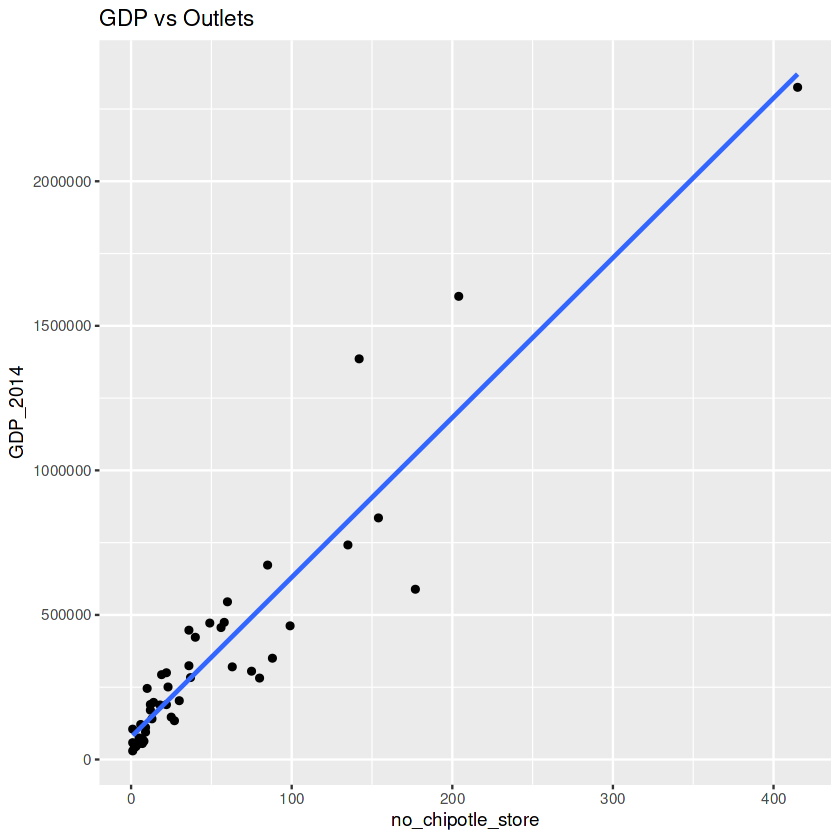

In [37]:
library(ggplot2)

# Create the scatter plot with regression line
ggplot(merged_new_data, aes(x = no_chipotle_store, y = GDP_2014)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  labs(title = "GDP vs Outlets") +
  xlab("no_chipotle_store") +
  ylab("GDP_2014")

`geom_smooth()` using formula = 'y ~ x'


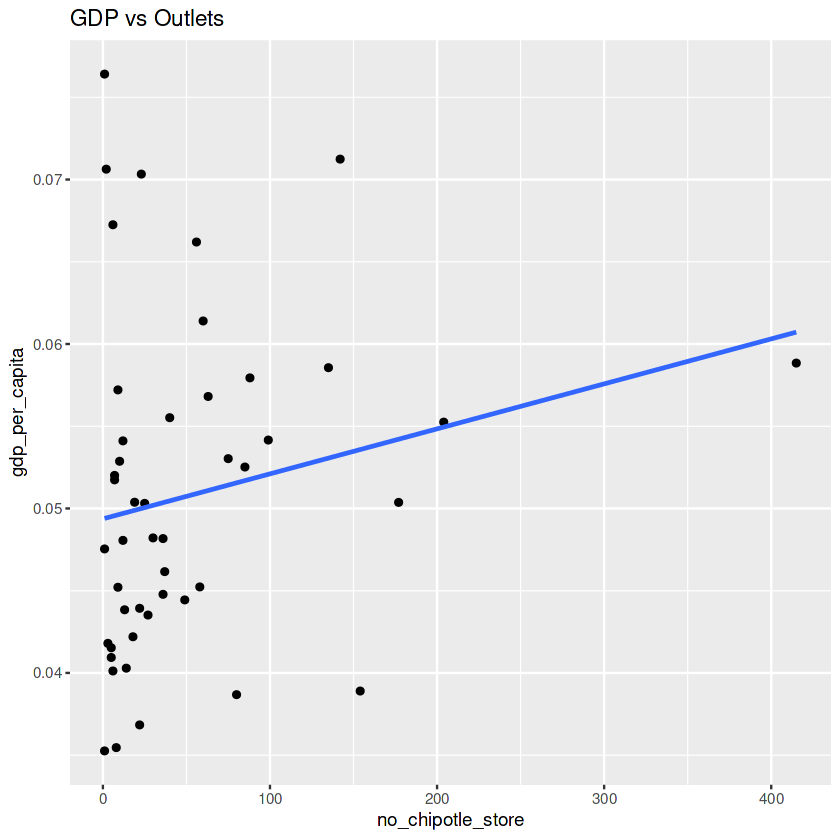

In [38]:
library(ggplot2)

# Creating the scatter plot with regression line
ggplot(merged_new_data, aes(x = no_chipotle_store, y = gdp_per_capita)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  labs(title = "GDP vs Outlets") +
  xlab("no_chipotle_store") +
  ylab("gdp_per_capita")

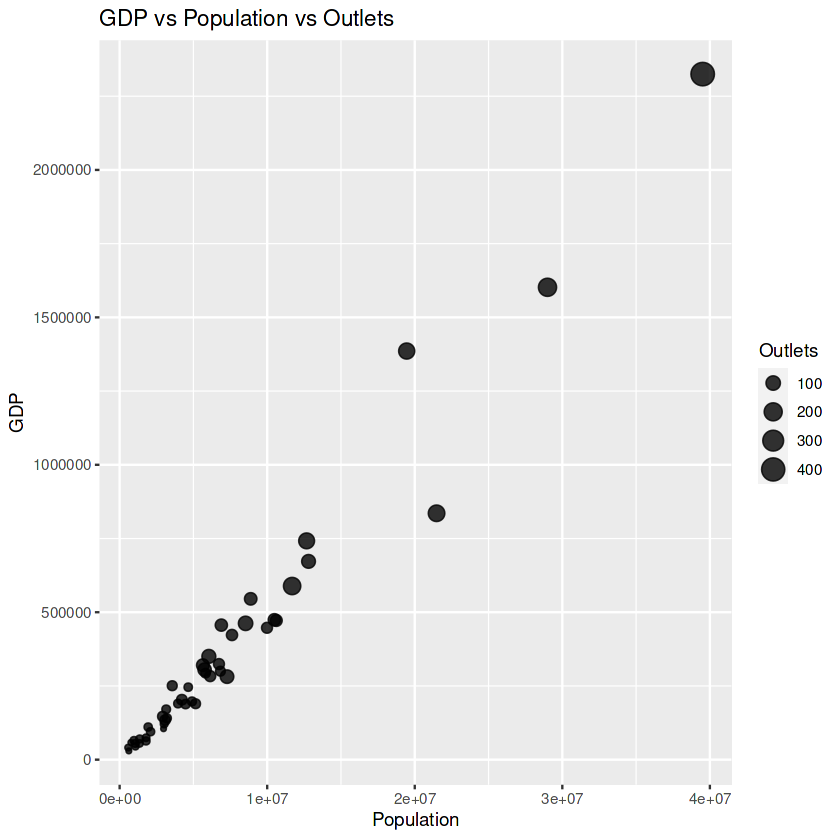

In [39]:
# Creating  the scatter plot for population, GDP, and outlets
ggplot(merged_new_data, aes(x = POP_ESTIMATE_2019, y = GDP_2014, size = no_chipotle_store)) +
  geom_point(alpha = 0.8) +
  labs(title = "GDP vs Population vs Outlets") +
  xlab("Population") +
  ylab("GDP") +
  scale_size_continuous(name = "Outlets")

In [40]:
#head() function to see the top 5 rows in R
head(merged_new_data)

NAME        no_chipotle_store POP_ESTIMATE_2019 GDP_2014  gdp_per_capita
1 Alabama      14                4903185           197534.5 0.04029       
2 Arizona      80                7278717           281558.8 0.03868       
3 Arkansas      6                3017804           121064.8 0.04012       
4 California  415               39512223          2324995.5 0.05884       
5 Colorado     75                5758736           305366.8 0.05303       
6 Connecticut  23                3565287           250763.8 0.07033

In [41]:
# Define new column names
new_names <- c("name", "no_chipotle_store", "population","gdp","gdp_per_capita")

# Change column names
names(merged_new_data) <- new_names

## Lets Predict the number of Outlets based on GDP and Population

In [42]:
# Fit Linear Regression
model <- lm( merged_new_data$no_chipotle_store ~  merged_new_data$gdp + merged_new_data$population, data = merged_new_data)

In [43]:
#Print R square 
summary(model)$r.squared

[1] 0.8886503

In [44]:
summary(model)


Call:
lm(formula = merged_new_data$no_chipotle_store ~ merged_new_data$gdp + 
    merged_new_data$population, data = merged_new_data)

Residuals:
   Min     1Q Median     3Q    Max 
-50.37 -13.27  -2.77   5.96  85.23 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)  
(Intercept)                -9.857e+00  5.189e+00  -1.900   0.0641 .
merged_new_data$gdp         8.157e-05  4.398e-05   1.855   0.0703 .
merged_new_data$population  4.585e-06  2.544e-06   1.802   0.0784 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 25.08 on 44 degrees of freedom
Multiple R-squared:  0.8887,	Adjusted R-squared:  0.8836 
F-statistic: 175.6 on 2 and 44 DF,  p-value: < 2.2e-16


## Now lets Predict The Number of Outlets Required

In [45]:
y_pred <- predict(model, newdata = merged_new_data)
y_pred <- round(y_pred)
y_pred

1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
 29  46  14 361  41  27   0 157  77   4 109  47  19  15  26  32   1  46  59  72 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
 42  12  41  -1   8  15   2  75   7 192  77  -2  92  24  26 104  -1  29  46 254 
 41  42  43  44  45  46  47 
 16  -5  67  60   4  41  -4

In [46]:
merged_new_data$predicted_outlets <- y_pred
(merged_new_data)

name           no_chipotle_store population gdp        gdp_per_capita
1  Alabama         14                4903185    197534.50 0.04029       
2  Arizona         80                7278717    281558.75 0.03868       
3  Arkansas         6                3017804    121064.75 0.04012       
4  California     415               39512223   2324995.50 0.05884       
5  Colorado        75                5758736    305366.75 0.05303       
6  Connecticut     23                3565287    250763.75 0.07033       
7  Delaware         6                 973764     65484.75 0.06725       
8  Florida        154               21477737    835578.50 0.03890       
9  Georgia         49               10617423    471879.50 0.04444       
10 Idaho            8                1787065     63364.00 0.03546       
11 Illinois       135               12671821    742027.75 0.05856       
12 Indiana         36                6732219    324289.00 0.04817       
13 Iowa            12                3155070    170715.00 0.05411       
14 Kansas          25                2913314    146562.00 0.05031       
15 Kentucky        18                4467673    188518.00 0.04220       
16 Louisiana       10                4648794    245790.75 0.05287       
17 Maine            5                1344212     55029.00 0.04094       
18 Maryland        88                6045680    350262.50 0.05794       
19 Massachusetts   56                6892503    456273.00 0.06620       
20 Michigan        36                9986857    447221.25 0.04478       
21 Minnesota       63                5639632    320381.25 0.05681       
22 Mississippi      1                2976149    104937.50 0.03526       
23 Missouri        37                6137428    283280.25 0.04616       
24 Montana          3                1068778     44672.25 0.04180       
25 Nebraska         9                1934408    110663.25 0.05721       
26 Nevada          27                3080156    134052.25 0.04352       
27 New Hampshire    7                1359711     70345.25 0.05174       
28 New Jersey      60                8882190    545374.25 0.06140       
29 New Mexico       9                2096829     94791.50 0.04521       
30 New York       142               19453561   1385776.25 0.07124       
31 North Carolina  58               10488084    474355.25 0.04523       
32 North Dakota     1                 762062     58230.00 0.07641       
33 Ohio           177               11689100    588827.75 0.05037       
34 Oklahoma        12                3956971    190170.50 0.04806       
35 Oregon          30                4217737    203328.00 0.04821       
36 Pennsylvania    85               12801989    672413.25 0.05252       
37 Rhode Island     7                1059361     55098.25 0.05201       
38 South Carolina  22                5148714    189655.50 0.03684       
39 Tennessee       22                6829174    300015.25 0.04393       
40 Texas          204               28995881   1601976.75 0.05525       
41 Utah            13                3205958    140565.00 0.04384       
42 Vermont          1                 623989     29661.75 0.04754       
43 Virginia        99                8535519    462243.00 0.05416       
44 Washington      40                7614893    422766.50 0.05552       
45 West Virginia    5                1792147     74432.75 0.04153       
46 Wisconsin       19                5822434    293341.25 0.05038       
47 Wyoming          2                 578759     40875.50 0.07063       
   predicted_outlets
1   29              
2   46              
3   14              
4  361              
5   41              
6   27              
7    0              
8  157              
9   77              
10   4              
11 109              
12  47              
13  19              
14  15              
15  26              
16  32              
17   1              
18  46              
19  59              
20  72              
21  42              
22  12              
23  41          

In [47]:
update_data=merged_new_data
head(update_data)

name        no_chipotle_store population gdp       gdp_per_capita
1 Alabama      14                4903185    197534.5 0.04029       
2 Arizona      80                7278717    281558.8 0.03868       
3 Arkansas      6                3017804    121064.8 0.04012       
4 California  415               39512223   2324995.5 0.05884       
5 Colorado     75                5758736    305366.8 0.05303       
6 Connecticut  23                3565287    250763.8 0.07033       
  predicted_outlets
1  29              
2  46              
3  14              
4 361              
5  41              
6  27

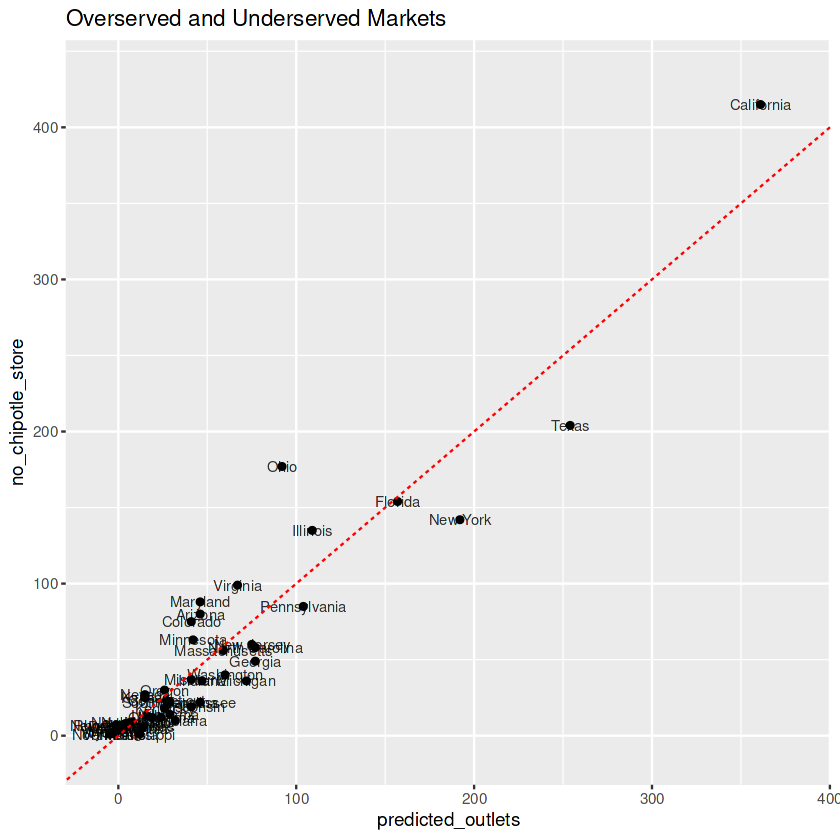

In [48]:
# Create the scatter plot with annotations
plot <- ggplot(data = update_data, aes(x = predicted_outlets, y = no_chipotle_store)) +
  geom_point() +
  geom_text(aes(label = name), alpha = 0.8, size = 3) +
  labs(title = "Overserved and Underserved Markets") +
  geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "red") +
  xlim(-10, max(update_data$predicted_outlets) + 20) +
  ylim(-10, max(update_data$no_chipotle_store) + 20)

# Show the plot
plot

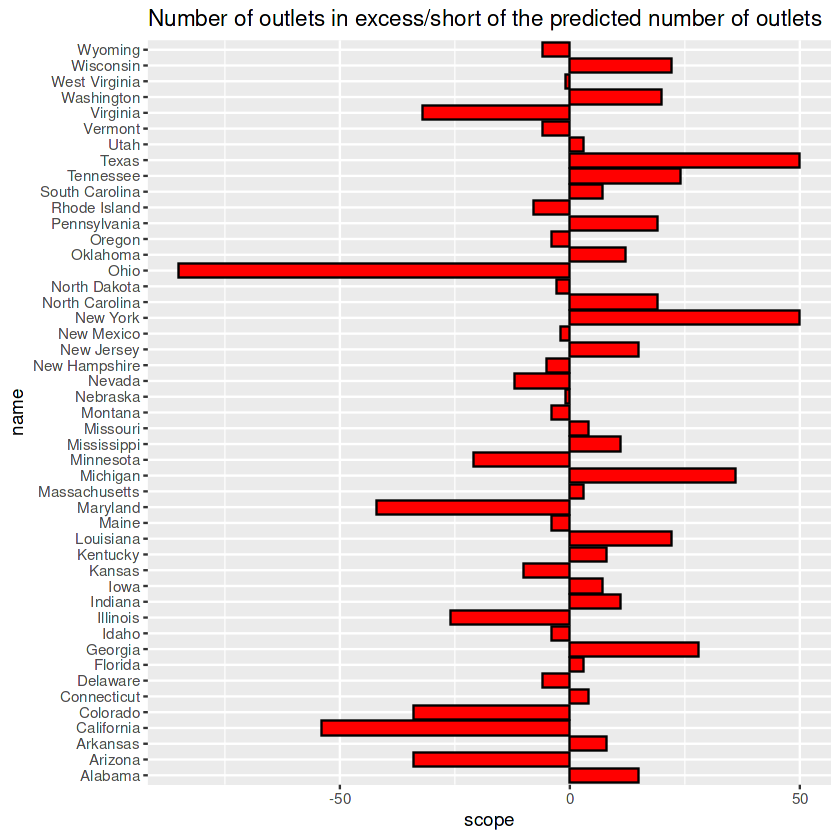

In [49]:
# Calculate the difference between predicted and actual outlets
update_data$scope <- update_data$predicted_outlets - update_data$no_chipotle_store

# Set the plot dimensions
#options(repr.plot.width = 4, repr.plot.height = 8)

bar_index <- seq_along(update_data$scope)
# Create the bar plot
plot <- ggplot(data = update_data[order(-update_data$scope), ], aes(x = scope, y = name)) +
  geom_bar(stat = "identity", fill = "red",col='black') +
  labs(title = "Number of outlets in excess/short of the predicted number of outlets") 
  #coord_flip()

# Show the plot
plot


In [50]:
#How many States in the US?

In [51]:
# Use the %in% operator to determine which states are in chipotles_by_state
state.abb %in% chipotles_by_state$st

# Use the %in% and ! operators to determine which states are not in chipotles_by_state
!state.abb %in% chipotles_by_state$st

# Create a states_wo_chipotles vector
states_wo_chipotles <- state.abb[!state.abb %in% chipotles_by_state$st]

# Print states with no Chipotles
states_wo_chipotles

[1]  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE
[13]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[25]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[37]  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[49]  TRUE  TRUE

[1] FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE
[13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[37] FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[49] FALSE FALSE

[1] "AK" "HI" "SD"

In [52]:
## Where to open a Chipotle?


#install.packages(c("tidycensus", "tidyverse", "plotly"))

library(tidycensus)
#Requesting data from Us Censusu Website by genereating a key on the website itself
census_api_key("fc47798562de48285a0293c1997f3e3d3609182f", install = TRUE)   
census_api_key("fc47798562de48285a0293c1997f3e3d3609182f", overwrite = TRUE)

south_dakota_pop <- get_acs(geography = "county", 
                     variables = "B01003_001", 
                     state = "SD",
                     geometry = TRUE) 


south_dakota_pop 
# Specify the file path and name for the output CSV file
output_file <- "/kaggle/input/data-file/south_dakota_population.csv"  
#creating a file with sepecific file name

# Save the data frame to a CSV file
write_csv(south_dakota_pop, path = output_file) #Uploading the above data in the above a=file
# Load south_dakota_pop.rds into an object called south_dakota_pop
#south_dakota_pop <- readRDS("datasets/south_dakota_pop.rds")

In [53]:
library(tidycensus)
#Requesting data from Us Censusu Website by genereating a key on the website itself
#census_api_key("fc47798562de48285a0293c1997f3e3d3609182f", install = TRUE)   
census_api_key("fc47798562de48285a0293c1997f3e3d3609182f", overwrite = TRUE)

south_dakota_pop <- get_acs(geography = "county", 
                     variables = "B01003_001", 
                     state = "SD",
                     geometry = TRUE) 


#south_dakota_pop 

To install your API key for use in future sessions, run this function with `install = TRUE`.

Getting data from the 2017-2021 5-year ACS




  |======================================================================| 100%


In [54]:
southdk=read_csv('/kaggle/input/data-file/south_dakota_population.csv')
pal <- colorNumeric(palette = "viridis", domain = southdk$estimate)

Rows: 66 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): NAME, variable, geometry
dbl (3): GEOID, estimate, moe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [55]:
#south_dakota_pop=read_csv('/kaggle/input/data-file/south_dakota_population.csv')
#southdk
# Create color palette to color map by county population estimate
#pal <- colorNumeric(palette = "viridis", domain = south_dakota_pop$estimate)
#pal <- colorNumeric(palette = "viridis", domain = southdk$estimate)
sd_pop_map <-
  south_dakota_pop %>%
  leaflet() %>%
  addProviderTiles("CartoDB") %>%
  # Add county boundaries with addPolygons and color by population estimate
  addPolygons(stroke = FALSE, fillOpacity = 0.7, color = ~ pal(estimate)) %>%
  # Add a legend using addLegend 
  addLegend(pal = pal, values = ~estimate, title = "Population")

# Print map of South Dakota population by county
sd_pop_map

Warning message:
“sf layer has inconsistent datum (+proj=longlat +datum=NAD83 +no_defs).
Need '+proj=longlat +datum=WGS84'”


HTML widgets cannot be represented in plain text (need html)

In [56]:
# Where to open a Chipotle II?

In [57]:
#list.files("datasets/")   to which folders are there in the folder
chipotle_sd_locations <- read_csv("/kaggle/input/data-file/chipotle_sd_location.csv")
View(chipotle_sd_locations)
#list.files("datasets/")  to know which files are located in the folder

# Load chipotle_sd_locations.csv that contains proposed South Dakota locations  
#chipotle_sd_locations <- read_csv("datasets/chipotle_sd_locations.csv")

# limit chipotle store data to locations in states boardering South Dakota
chipotle_market_research <- 
  chipotle_open %>% 
  filter(st %in% c("IA", "MN", "MT", "ND", "NE", "WY")) %>% 
  select(city, st, lat, lon) %>% 
  mutate(status = "open") %>% 
  # bind the data on proposed SD locations onto the open store data
  bind_rows(chipotle_sd_locations) 

# print the market research data
chipotle_market_research

Rows: 2 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): city, st, status
dbl (2): lat, lon

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


city        st lat      lon        status  
1 Rapid City  SD 44.08054 -103.23100 proposed
2 Sioux Falls SD 43.54730  -96.72833 proposed

city             st lat      lon        status  
1  Lincoln          NE 40.81311  -96.64009 open    
2  Brooklyn Park    MN 45.09414  -93.38321 open    
3  Eagan            MN 44.83598  -93.15196 open    
4  Champlin         MN 45.15832  -93.39078 open    
5  Woodbury         MN 44.94463  -92.90468 open    
6  Columbia Heights MN 45.06271  -93.24830 open    
7  Fargo            ND 46.85503  -96.86172 open    
8  Iowa City        IA 41.65975  -91.53489 open    
9  Minnetonka       MN 44.91803  -93.50246 open    
10 Minneapolis      MN 44.95535  -93.29721 open    
11 Maple Grove      MN 45.09568  -93.44131 open    
12 Eagan            MN 44.79070  -93.21178 open    
13 Minneapolis      MN 44.97353  -93.27533 open    
14 Plymouth         MN 45.02058  -93.48253 open    
15 Rochester        MN 44.00607  -92.46423 open    
16 Edina            MN 44.87915  -93.32056 open    
17 West Des Moines  IA 41.56251  -93.79929 open    
18 Minneapolis      MN 44.97306  -93.24702 open    
19 Sioux City       IA 42.44571  -96.34321 open    
20 Saint Paul       MN 44.94546  -93.09537 open    
21 Cheyenne         WY 41.16074 -104.80572 open    
22 Cottage Grove    MN 44.83287  -92.95760 open    
23 Lincoln          NE 40.81569  -96.70236 open    
24 Bellevue         NE 41.15788  -95.93475 open    
25 Vadnais Heights  MN 45.05199  -93.06330 open    
26 Minneapolis      MN 44.98801  -93.25691 open    
27 Crystal          MN 45.05509  -93.36497 open    
28 Lincoln          NE 40.73930  -96.67951 open    
29 Eden Prairie     MN 44.85924  -93.44287 open    
30 Oak Park Heights MN 45.03565  -92.83741 open    
⋮  ⋮                ⋮  ⋮        ⋮          ⋮       
63 Papillion        NE 41.16240  -96.02331 open    
64 Maplewood        MN 45.01041  -93.02384 open    
65 St. Paul         MN 44.94011  -93.13683 open    
66 Maple Grove      MN 45.13361  -93.47686 open    
67 Omaha            NE 41.23365  -96.19198 open    
68 St Louis Park    MN 44.93173  -93.34841 open    
69 Casper           WY 42.84809 -106.26045 open    
70 Omaha            NE 41.25877  -96.02323 open    
71 Blaine           MN 45.16047  -93.23382 open    
72 Omaha            NE 41.23372  -96.12033 open    
73 Ames             IA 42.01763  -93.61094 open    
74 Burnsville       MN 44.74756  -93.28872 open    
75 West St Paul     MN 44.89016  -93.08114 open    
76 Mankato          MN 44.14617  -93.99405 open    
77 Ankeny           IA 41.70933  -93.58078 open    
78 Dubuque          IA 42.49154  -90.72009 open    
79 Golden Valley    MN 44.98448  -93.38111 open    
80 Minneapolis      MN 45.03891  -93.21979 open    
81 Rochester        MN 44.06277  -92.50010 open    
82 Blaine           MN 45.12729  -93.25675 open    
83 Apple Valley     MN 44.73114  -93.21937 open    
84 Woodbury         MN 44.92473  -92.95501 open    
85 Des Moines       IA 41.62889  -93.69722 open    
86 Shoreview        MN 45.05809  -93.14353 open    
87 Cedar Rapids     IA 41.95441  -91.71653 open    
88 Maplewood        MN 45.03555  -93.01951 open    
89 Mankato          MN 44.16630  -93.95140 open    
90 Waterloo         IA 42.46412  -92.32460 open    
91 Rapid City       SD 44.08054 -103.23100 proposed
92 Sioux Falls      SD 43.54730  -96.72833 proposed

In [58]:
#Where to open a Chipotle III?

In [59]:
# Create a blue and red color palette to distinguish between open and proposed stores
pal <- colorFactor(palette = c("Blue", "Red"), domain = c("open", "proposed"))

# Map the open and proposed locations
sd_proposed_map <-
  
  chipotle_market_research %>% 
leaflet() %>%
  # Add the Stamen Toner provider tile
  addProviderTiles("Stamen.Toner") %>%
  # Apply the pal color palette
  addCircles(color = ~pal(status)) %>%
  # Draw a circle with a 100 mi radius around the proposed locations
  addCircles(data = chipotle_sd_locations, radius = 100  * 1609.34, color = ~pal(status), fill = FALSE) 

# Print the map of proposed locations 
sd_proposed_map

Assuming "lon" and "lat" are longitude and latitude, respectively

Assuming "lon" and "lat" are longitude and latitude, respectively



HTML widgets cannot be represented in plain text (need html)

In [60]:
#From teh above map, it looks like there's a Chipotle Within a 100 Miles of the proposed Sioux Falls Location,
#but not Rapid city.

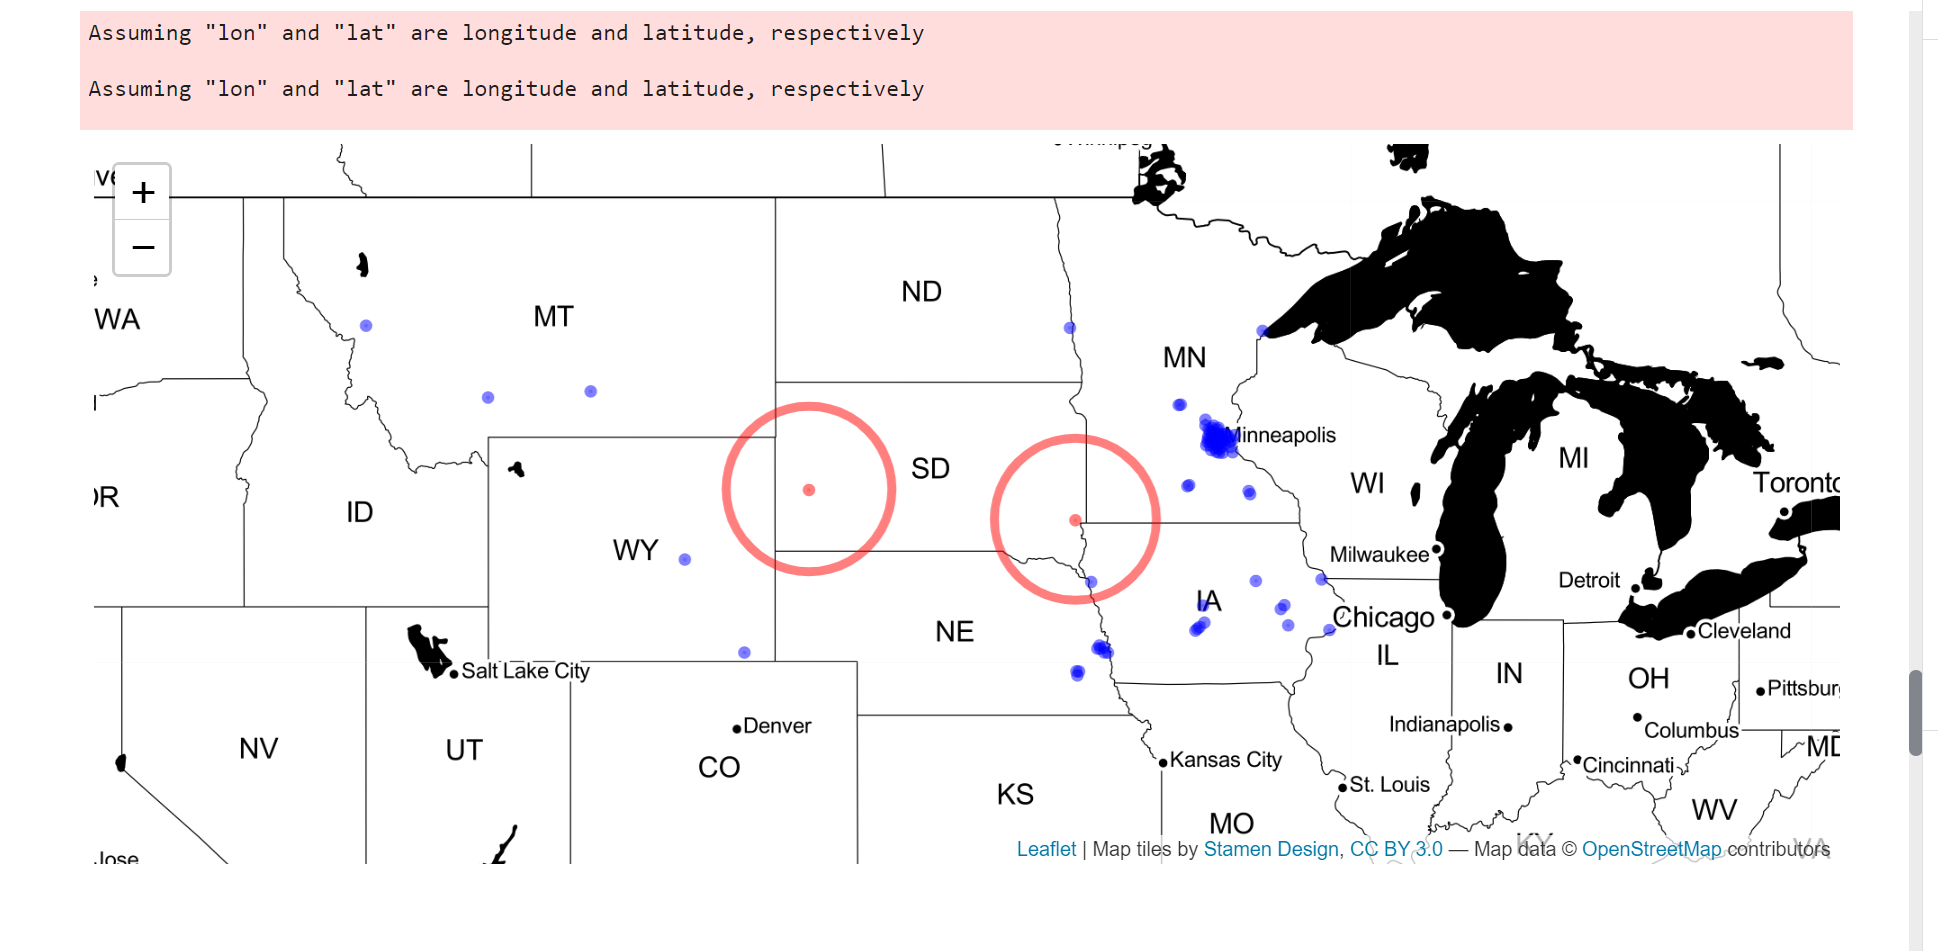

![image1](http://)

In [61]:
#Where to open a Chipotle IV


In [62]:
#view(polys)
polys=chipotle[,c(3,4,6,7,8)]
#View(polys)
polys=subset(polys, st %in% c('NE', 'MN', 'ND', 'IA', 'WY', 'MT', 'SD'))
#View(polys)
# Assuming you have a color palette defined
#View(chipotle)
colnames(polys)[5] <- "status"
# Replace 'status' with the appropriate variable in your dataset
#View(polys)
#polys$status[polys$status == 'TRUE'] <- 'open'
polys$status[polys$status == 'FALSE'] <- 'open'
class(polys$geometry)



# Combine lat and lon columns into a matrix of coordinates
coordinates <- cbind(polys$lon, polys$lat)
#head(coordinates)
# Create a data frame with geometry column
coordinates_closed <- rbind(coordinates, coordinates[1,])

# Create a list of polygons
polygons = list(coordinates_closed)
polygons
polygon <- st_sfc(st_polygon(polygons))
View(polygon)
# Convert the polygon to a data frame
# Create an sf object by combining the data frame with the sfc object
data_sf <- st_sf(polys, geometry = polygon)

# Check the class of the resulting object
(data_sf)
voronoi_map <- 
  data_sf %>%
  leaflet() %>%
  # Use the CartoDB provider tile
  addProviderTiles("CartoDB") %>%
  # Plot Voronoi polygons using addPolygons
  addPolygons(fillColor = ~pal(status), weight = 0.5, color = "black") %>%
  # Add proposed and open locations as another layer
  addCircleMarkers(data = chipotle_market_research, label = ~city, color = ~pal(status))

# Print the Voronoi map
voronoi_map

[1] "NULL"

[[1]]
            [,1]     [,2]
 [1,]  -96.64009 40.81311
 [2,]  -93.38321 45.09414
 [3,]  -93.15196 44.83598
 [4,]  -93.39078 45.15832
 [5,]  -92.90468 44.94463
 [6,]  -93.24830 45.06271
 [7,]  -96.86172 46.85503
 [8,]  -91.53489 41.65975
 [9,]  -93.50246 44.91803
[10,]  -93.29721 44.95535
[11,]  -93.44131 45.09568
[12,]  -93.21178 44.79070
[13,]  -93.27533 44.97353
[14,]  -93.48253 45.02058
[15,]  -92.46423 44.00607
[16,]  -93.32056 44.87915
[17,]  -93.79929 41.56251
[18,]  -93.24702 44.97306
[19,]  -96.34321 42.44571
[20,]  -93.09537 44.94546
[21,] -104.80572 41.16074
[22,]  -92.95760 44.83287
[23,]  -96.70236 40.81569
[24,]  -95.93475 41.15788
[25,]  -93.06330 45.05199
[26,]  -93.25691 44.98801
[27,]  -93.36497 45.05509
[28,]  -96.67951 40.73930
[29,]  -93.44287 44.85924
[30,]  -92.83741 45.03565
[31,]  -93.32909 44.81121
[32,]  -93.75028 41.59773
[33,]  -93.55508 45.30128
[34,]  -93.41413 44.77631
[35,]  -93.53447 44.85937
[36,]  -93.34908 44.93186
[37,]  -96.14288 41.29172
[38,] -114.03997 46.89219
[39,]  -91.62691 42.02683
[40,] -108.55691 45.78452
[41,]  -93.35482 45.19877
[42,]  -93.43798 44.96735
[43,] -111.06301 45.68020
[44,]  -93.49663 44.97146
[45,]  -93.32123 44.94747
[46,]  -93.26794 44.97690
[47,]  -90.52931 41.57316
[48,]  -92.89264 44.73887
[49,]  -93.24207 44.85360
[50,]  -93.32095 45.05915
[51,]  -93.13359 44.73130
[52,]  -94.20619 45.55133
[53,]  -93.28887 44.86401
[54,]  -92.15970 46.80487
[55,]  -93.55395 45.20074
[56,]  -94.15654 45.55869
[57,]  -93.18856 44.91752
[58,]  -93.22691 44.97346
[59,]  -93.17024 45.01278
[60,]  -93.24853 44.88395
[61,]  -93.27181 44.97825
[62,]  -93.40996 44.92419
[63,]  -96.02331 41.16240
[64,]  -93.02384 45.01041
[65,]  -93.13683 44.94011
[66,]  -93.47686 45.13361
[67,]  -96.19198 41.23365
[68,]  -93.34841 44.93173
[69,] -106.26045 42.84809
[70,]  -96.02323 41.25877
[71,]  -93.23382 45.16047
[72,]  -96.12033 41.23372
[73,]  -93.61094 42.01763
[74,]  -93.28872 44.74756
[75,]  -93.08114 44.89016
[76,]  -93.99405 44.14617
[77,]  -93.58078 41.70933
[78,]  -90.72009 42.49154
[79,]  -93.38111 44.98448
[80,]  -93.21979 45.03891
[81,]  -92.50010 44.06277
[82,]  -93.25675 45.12729
[83,]  -93.21937 44.73114
[84,]  -92.95501 44.92473
[85,]  -93.69722 41.62889
[86,]  -93.14353 45.05809
[87,]  -91.71653 41.95441
[88,]  -93.01951 45.03555
[89,]  -93.95140 44.16630
[90,]  -92.32460 42.46412
[91,]  -96.64009 40.81311

POLYGON ((-96.64009 40.81311, -93.38321 45.0941...

Registered S3 method overwritten by 'geojsonsf':
  method        from   
  print.geojson geojson



Geometry set for 1 feature 
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: -114.04 ymin: 40.7393 xmax: -90.52932 ymax: 46.89219
CRS:           NA

Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”


city             st lat      lon        status
1  Lincoln          NE 40.81311  -96.64009 open  
2  Brooklyn Park    MN 45.09414  -93.38321 open  
3  Eagan            MN 44.83598  -93.15196 open  
4  Champlin         MN 45.15832  -93.39078 open  
5  Woodbury         MN 44.94463  -92.90468 open  
6  Columbia Heights MN 45.06271  -93.24830 open  
7  Fargo            ND 46.85503  -96.86172 open  
8  Iowa City        IA 41.65975  -91.53489 open  
9  Minnetonka       MN 44.91803  -93.50246 open  
10 Minneapolis      MN 44.95535  -93.29721 open  
11 Maple Grove      MN 45.09568  -93.44131 open  
12 Eagan            MN 44.79070  -93.21178 open  
13 Minneapolis      MN 44.97353  -93.27533 open  
14 Plymouth         MN 45.02058  -93.48253 open  
15 Rochester        MN 44.00607  -92.46423 open  
16 Edina            MN 44.87915  -93.32056 open  
17 West Des Moines  IA 41.56251  -93.79929 open  
18 Minneapolis      MN 44.97306  -93.24702 open  
19 Sioux City       IA 42.44571  -96.34321 open  
20 Saint Paul       MN 44.94546  -93.09537 open  
21 Cheyenne         WY 41.16074 -104.80572 open  
22 Cottage Grove    MN 44.83287  -92.95760 open  
23 Lincoln          NE 40.81569  -96.70236 open  
24 Bellevue         NE 41.15788  -95.93475 open  
25 Vadnais Heights  MN 45.05199  -93.06330 open  
26 Minneapolis      MN 44.98801  -93.25691 open  
27 Crystal          MN 45.05509  -93.36497 open  
28 Lincoln          NE 40.73930  -96.67951 open  
29 Eden Prairie     MN 44.85924  -93.44287 open  
30 Oak Park Heights MN 45.03565  -92.83741 open  
⋮  ⋮                ⋮  ⋮        ⋮          ⋮     
61 Minneapolis      MN 44.97825  -93.27181 open  
62 Hopkins          MN 44.92419  -93.40996 open  
63 Papillion        NE 41.16240  -96.02331 open  
64 Maplewood        MN 45.01041  -93.02384 open  
65 St. Paul         MN 44.94011  -93.13683 open  
66 Maple Grove      MN 45.13361  -93.47686 open  
67 Omaha            NE 41.23365  -96.19198 open  
68 St Louis Park    MN 44.93173  -93.34841 open  
69 Casper           WY 42.84809 -106.26045 open  
70 Omaha            NE 41.25877  -96.02323 open  
71 Blaine           MN 45.16047  -93.23382 open  
72 Omaha            NE 41.23372  -96.12033 open  
73 Ames             IA 42.01763  -93.61094 open  
74 Burnsville       MN 44.74756  -93.28872 open  
75 West St Paul     MN 44.89016  -93.08114 open  
76 Mankato          MN 44.14617  -93.99405 open  
77 Ankeny           IA 41.70933  -93.58078 open  
78 Dubuque          IA 42.49154  -90.72009 open  
79 Golden Valley    MN 44.98448  -93.38111 open  
80 Minneapolis      MN 45.03891  -93.21979 open  
81 Rochester        MN 44.06277  -92.50010 open  
82 Blaine           MN 45.12729  -93.25675 open  
83 Apple Valley     MN 44.73114  -93.21937 open  
84 Woodbury         MN 44.92473  -92.95501 open  
85 Des Moines       IA 41.62889  -93.69722 open  
86 Shoreview        MN 45.05809  -93.14353 open  
87 Cedar Rapids     IA 41.95441  -91.71653 open  
88 Maplewood        MN 45.03555  -93.01951 open  
89 Mankato          MN 44.16630  -93.95140 open  
90 Waterloo         IA 42.46412  -92.32460 open  
   geometry                      
1  POLYGON ((-96.64009 40.8131...
2  POLYGON ((-96.64009 40.8131...
3  POLYGON ((-96.64009 40.8131...
4  POLYGON ((-96.64009 40.8131...
5  POLYGON ((-96.64009 40.8131...
6  POLYGON ((-96.64009 40.8131...
7  POLYGON ((-96.64009 40.8131...
8  POLYGON ((-96.64009 40.8131...
9  POLYGON ((-96.64009 40.8131...
10 POLYGON ((-96.64009 40.8131...
11 POLYGON ((-96.64009 40.8131...
12 POLYGON ((-96.64009 40.8131...
13 POLYGON ((-96.64009 40.8131...
14 POLYGON ((-96.64009 40.8131...
15 POLYGON ((-96.64009 40.8131...
16 POLYGON ((-96.64009 40.8131...
17 POLYGON ((-96.64009 40.8131...
18 POLYGON ((-96.64009 40.8131...
19 POLYGON ((-96.64009 40.8131...
20 POLYGON ((-96.64009 40.8131...
21 POLYGON ((-96.64009 40.8131...
22 POLYGON ((-96.64009 40.8131...
23 POLYGON ((-96.64009 40.8131...
24 POLYGON ((-96.64009 40.8131...
25 POLYGON ((-96.64009 40.8131...
26 POLYGON ((-96.64

Assuming "lon" and "lat" are longitude and latitude, respectively



HTML widgets cannot be represented in plain text (need html)

In [63]:
next_chipotle <- tibble(location = c("Rapid City, SD", "Sioux Falls, SD"),
                        open_new_store = c(TRUE, FALSE))
next_chipotle

location        open_new_store
1 Rapid City, SD   TRUE         
2 Sioux Falls, SD FALSE